# Analisando os dados dos sites da globo usando bag of words

In [1]:
import pandas as pd

df = pd.read_csv('C:\\Users\\samsung\\Desktop\\df_sites_globo2.csv')

In [2]:
df.head()

,Unnamed: 0,url,titulo,conteudo
0,0,https://g1.globo.com/globonews/globonews-docum...,"""fevereiros"" revela as origens de maria bethân...","O documentário, parceria entre GloboNews e Glo..."
1,0,https://g1.globo.com/globonews/jornal-globonew...,george w. bush parabeniza biden e harris pela ...,"O ex-presidente americano, o republicano Georg..."
2,0,https://g1.globo.com/globonews/fatos-e-versoes...,taxação do aço brasileiro pelos eua causa surp...,A recente taxação do aço brasileiro por parte ...
3,0,https://g1.globo.com/globonews/globonews-docum...,'documentário 24h em wuhan' mostra a realidade...,Equipe de uma TV chinesa percorreu o local e m...
4,0,https://g1.globo.com/globonews/jornal-das-dez/...,guga chacra comenta discurso de joe biden ‘um ...,"Democrata Joe Biden discursou em Wilmington, n..."


In [3]:
df.titulo.isnull().sum()

0

In [4]:
df.url.isnull().sum()

0

In [5]:
df.shape

(1500, 4)

### Primeiro vamos usar apenas os textos dos títulos das páginas

* Há poucos dados para se trabalhar

In [6]:
df.columns

Index(['Unnamed: 0', 'url', 'titulo', 'conteudo'], dtype='object')

In [7]:
df = df.drop(df.columns[[0]], axis=1)

In [8]:
df.head()

,url,titulo,conteudo
0,https://g1.globo.com/globonews/globonews-docum...,"""fevereiros"" revela as origens de maria bethân...","O documentário, parceria entre GloboNews e Glo..."
1,https://g1.globo.com/globonews/jornal-globonew...,george w. bush parabeniza biden e harris pela ...,"O ex-presidente americano, o republicano Georg..."
2,https://g1.globo.com/globonews/fatos-e-versoes...,taxação do aço brasileiro pelos eua causa surp...,A recente taxação do aço brasileiro por parte ...
3,https://g1.globo.com/globonews/globonews-docum...,'documentário 24h em wuhan' mostra a realidade...,Equipe de uma TV chinesa percorreu o local e m...
4,https://g1.globo.com/globonews/jornal-das-dez/...,guga chacra comenta discurso de joe biden ‘um ...,"Democrata Joe Biden discursou em Wilmington, n..."


In [9]:
import numpy as np

conditions = [
    (df['url'].str.contains('gshow')),
    (df['url'].str.contains('globonews')),
    (df['url'].str.contains('globoesporte')),
    ]

choices = ['gshow', 'globonews','globoesporte']

df['url_origem'] = np.select(conditions,choices)

In [10]:
df.head()

,url,titulo,conteudo,url_origem
0,https://g1.globo.com/globonews/globonews-docum...,"""fevereiros"" revela as origens de maria bethân...","O documentário, parceria entre GloboNews e Glo...",globonews
1,https://g1.globo.com/globonews/jornal-globonew...,george w. bush parabeniza biden e harris pela ...,"O ex-presidente americano, o republicano Georg...",globonews
2,https://g1.globo.com/globonews/fatos-e-versoes...,taxação do aço brasileiro pelos eua causa surp...,A recente taxação do aço brasileiro por parte ...,globonews
3,https://g1.globo.com/globonews/globonews-docum...,'documentário 24h em wuhan' mostra a realidade...,Equipe de uma TV chinesa percorreu o local e m...,globonews
4,https://g1.globo.com/globonews/jornal-das-dez/...,guga chacra comenta discurso de joe biden ‘um ...,"Democrata Joe Biden discursou em Wilmington, n...",globonews


In [11]:
df.describe()

,url,titulo,conteudo,url_origem
count,1500,1500,1500,1500
unique,1500,1468,1465,3
top,https://gshow.globo.com/novelas/haja-coracao/v...,participante do 'milionário' pede duas ajudas ...,Edivan Duarte participa do 'Quem Quer Ser Um ...,globonews
freq,1,5,5,500


In [12]:
df['sub_categoria'] = df.url.str.replace('https://g1.globo.com/globonews/', '')
df['sub_categoria'] = df.sub_categoria.str.replace('https://globoesporte.globo.com/', '')
df['sub_categoria'] = df.sub_categoria.str.replace('https://gshow.globo.com/', '')

In [13]:
df.head()

,url,titulo,conteudo,url_origem,sub_categoria
0,https://g1.globo.com/globonews/globonews-docum...,"""fevereiros"" revela as origens de maria bethân...","O documentário, parceria entre GloboNews e Glo...",globonews,globonews-documentario/video/fevereiros-revela...
1,https://g1.globo.com/globonews/jornal-globonew...,george w. bush parabeniza biden e harris pela ...,"O ex-presidente americano, o republicano Georg...",globonews,jornal-globonews/video/george-w-bush-parabeniz...
2,https://g1.globo.com/globonews/fatos-e-versoes...,taxação do aço brasileiro pelos eua causa surp...,A recente taxação do aço brasileiro por parte ...,globonews,fatos-e-versoes/video/taxacao-do-aco-brasileir...
3,https://g1.globo.com/globonews/globonews-docum...,'documentário 24h em wuhan' mostra a realidade...,Equipe de uma TV chinesa percorreu o local e m...,globonews,globonews-documentario/video/documentario-24h-...
4,https://g1.globo.com/globonews/jornal-das-dez/...,guga chacra comenta discurso de joe biden ‘um ...,"Democrata Joe Biden discursou em Wilmington, n...",globonews,jornal-das-dez/video/guga-chacra-comenta-discu...


In [14]:
df['sub_categoria'] = df.sub_categoria.str.split('/')
df['sub_categoria'] = df.sub_categoria.map(lambda x: x[0])
df.head()

,url,titulo,conteudo,url_origem,sub_categoria
0,https://g1.globo.com/globonews/globonews-docum...,"""fevereiros"" revela as origens de maria bethân...","O documentário, parceria entre GloboNews e Glo...",globonews,globonews-documentario
1,https://g1.globo.com/globonews/jornal-globonew...,george w. bush parabeniza biden e harris pela ...,"O ex-presidente americano, o republicano Georg...",globonews,jornal-globonews
2,https://g1.globo.com/globonews/fatos-e-versoes...,taxação do aço brasileiro pelos eua causa surp...,A recente taxação do aço brasileiro por parte ...,globonews,fatos-e-versoes
3,https://g1.globo.com/globonews/globonews-docum...,'documentário 24h em wuhan' mostra a realidade...,Equipe de uma TV chinesa percorreu o local e m...,globonews,globonews-documentario
4,https://g1.globo.com/globonews/jornal-das-dez/...,guga chacra comenta discurso de joe biden ‘um ...,"Democrata Joe Biden discursou em Wilmington, n...",globonews,jornal-das-dez


In [15]:
df.sub_categoria.describe()

count        1500
unique        102
top       novelas
freq          134
Name: sub_categoria, dtype: object

In [16]:
df[df['url_origem'] == 'globoesporte'].groupby('sub_categoria').count().sort_values(by=['url_origem'], ascending=False)

,url,titulo,conteudo,url_origem
sub_categoria,,,,
combate,51,51,51,51
futebol,49,49,49,49
esports,42,42,42,42
pi,38,38,38,38
sp,34,34,34,34
pe,31,31,31,31
ac,20,20,20,20
am,20,20,20,20
pb,18,18,18,18


In [17]:
df[df['url_origem'] == 'globonews'].groupby('sub_categoria').count().sort_values(by=['url_origem'], ascending=False)

,url,titulo,conteudo,url_origem
sub_categoria,,,,
fatos-e-versoes,33,33,33,33
mundo-sa,32,32,32,32
globonews-documentario,31,31,31,31
jornal-globonews-edicao-das-18,30,30,30,30
globonews-miriam-leitao,26,26,26,26
via-brasil,25,25,25,25
dialogos-com-mario-sergio-conti,25,25,25,25
conta-corrente,24,24,24,24
jornal-globonews,24,24,24,24


In [18]:
df[df['url_origem'] == 'gshow'].groupby('sub_categoria').count().sort_values(by=['url_origem'], ascending=False)

,url,titulo,conteudo,url_origem
sub_categoria,,,,
novelas,134,134,134,134
programas,94,94,94,94
receitas-gshow,55,55,55,55
Famosos,51,51,51,51
realities,48,48,48,48
series,32,32,32,32
RBS-TV-RS,17,17,17,17
moda-e-beleza,16,16,16,16
TV-Rio-Sul,12,12,12,12


In [19]:
df = df.sample(frac=1).reset_index(drop=True)

In [21]:
df.head(1)

,url,titulo,conteudo,url_origem,sub_categoria
0,https://g1.globo.com/globonews/fatos-e-versoes...,"fatos e versões o escândalo na caixa, a transf...","Cristiana Lôbo debate com Carolina Brígido, de...",globonews,fatos-e-versoes


In [22]:
df = df.drop(df.columns[[0]], axis=1)

In [23]:
df.columns

Index(['titulo', 'conteudo', 'url_origem', 'sub_categoria'], dtype='object')

# pré-processamento nos textos de título

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vetorizador = CountVectorizer(lowercase = True, max_features = 100) 

In [25]:
bag_of_words = vetorizador.fit_transform(df["titulo"])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df.url_origem, test_size=0.33, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression()

reg_log.fit(x_train,y_train)
reg_log.score(x_test,y_test)

C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.997979797979798

In [27]:
# data leakage

In [28]:
vetorizador = CountVectorizer(lowercase = True, max_features = 5) 
bag_of_words = vetorizador.fit_transform(df["titulo"])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df.url_origem, test_size=0.33, random_state=42)

reg_log = LogisticRegression()

reg_log.fit(x_train,y_train)
reg_log.score(x_test,y_test)

0.997979797979798

In [29]:
bag_of_words

<1500x5 sparse matrix of type '<class 'numpy.int64'>'
	with 2386 stored elements in Compressed Sparse Row format>

In [30]:
# poucas palavras estão extremamenrte relevantes para o texto

In [31]:
print(reg_log.coef_)

[[-0.35444812 -0.08258159 -0.2630758  -1.9122315   7.14740261]
 [-0.40729456 -0.30449306 -0.08988773  7.27905056 -1.78182289]
 [ 0.34517586  0.10462485  0.1158555  -6.65940272 -6.58624958]]


In [32]:
# encontrando as palavras que fazem o data leakage

In [35]:
df.head()

,titulo,conteudo,url_origem,sub_categoria,titulo_processado
0,"fatos e versões o escândalo na caixa, a transf...","Cristiana Lôbo debate com Carolina Brígido, de...",globonews,fatos-e-versoes,"fatos e versões o escândalo na caixa, a transf..."
1,beto se declara e beija tancinha vem por aí,Por Gshow Beto (João Baldasserini) se declar...,gshow,novelas,beto se declara e beija tancinha vem por aí
2,"reveja os vídeos do ‘conexão bahia’ de sábado,...","Conexão Bahia de 31102020, na íntegra Jucima...",gshow,Rede-Bahia,"reveja os vídeos do ‘conexão bahia’ de sábado,..."
3,gabeira defende impugnação de candidaturas de ...,TCU Quase 11 mil candidatos receberam auxílio ...,globonews,jornal-globonews-edicao-das-18,gabeira defende impugnação de candidaturas de ...
4,nevada anuncia que ainda faltam pouco mais de ...,"Além desses, ainda existem mais 60 mil votos p...",globonews,jornal-globonews-edicao-das-16,nevada anuncia que ainda faltam pouco mais de ...


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


def pareto(df_n,coluna_texto,url_origem = 'all',num_bar = 10):
    
    if str(url_origem) == 'all':
        cor = 'grey'
    elif str(url_origem) == 'globoesporte':
        cor = 'green'
    elif str(url_origem) == 'globonews':
        cor = 'red'
    else:
        cor  = 'orange'
    
    if str(url_origem) != 'all':
        df_n = df[df['url_origem'] == url_origem]
    
    palavras = ' '.join([texto for texto in df_n[coluna_texto]])
    frequencia = nltk.FreqDist(tokenizador.tokenize(palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = num_bar)
    plt.figure(figsize=(20,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = cor)
    ax.set(ylabel = "Contagem")
    plt.show()

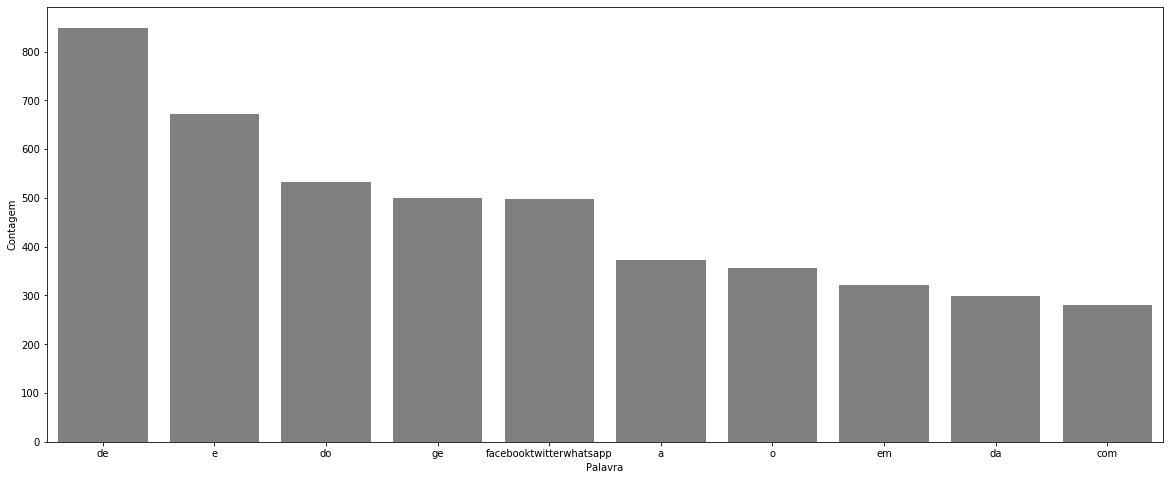

In [61]:
pareto(df,'titulo')

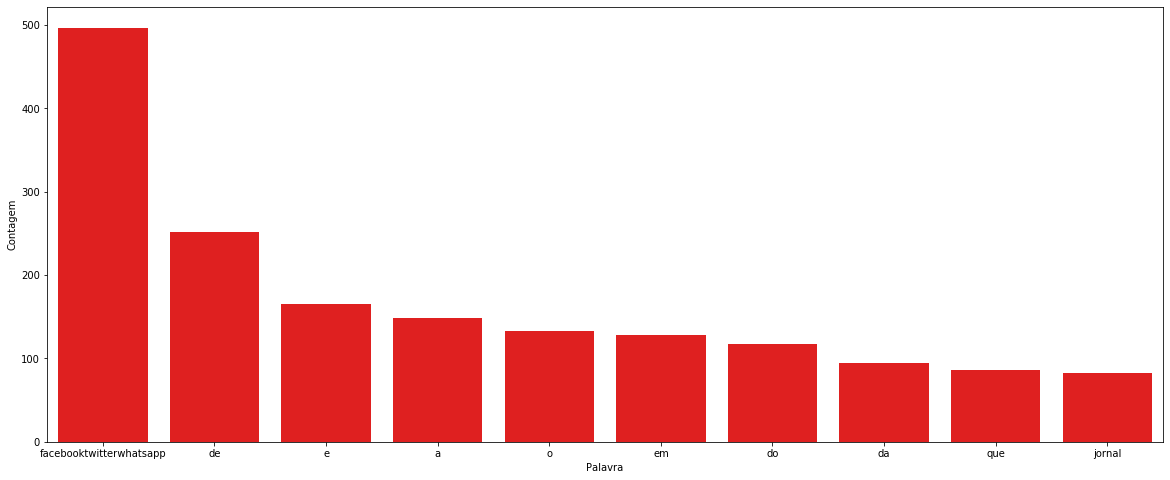

In [62]:
pareto(df,'titulo','globonews')

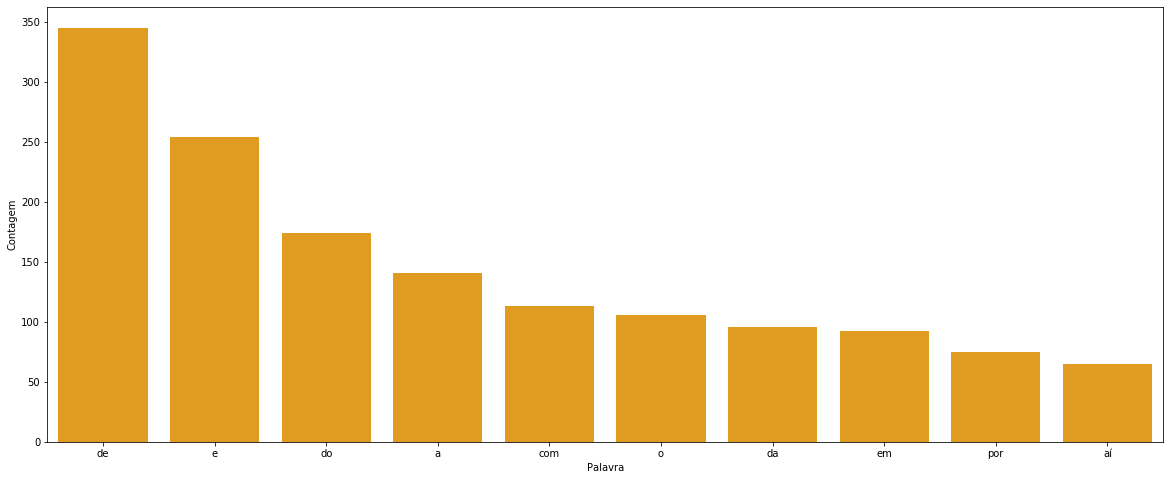

In [63]:
pareto(df,'titulo','gshow')

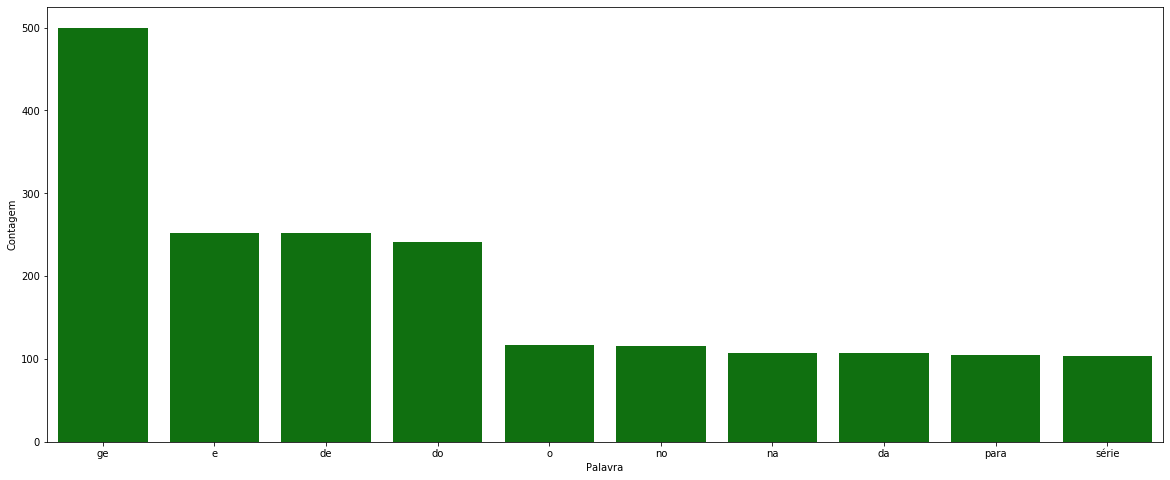

In [64]:
pareto(df,'titulo','globoesporte')

In [65]:
# as palavras ge estão em todas os textos de esporte, assim como facebooktwitterwhatssapp pra noticias, 
# por isso foi tão fácil predizer o modelo  

In [67]:
import nltk
from nltk import tokenize

# remove stop words
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words("portuguese")


# remove pontuações
from string import punctuation
pontuações = []
for ponto in punctuation:
    pontuações.append(ponto)
    
    
tokenizador = tokenize.WordPunctTokenizer()

dicionário = ['facebooktwitterwhatsapp', 'ge']

filtro = pontuações + stop_words + dicionário

texto_processado = []
for titulo in df.titulo:
    palavras_relevantes = []
    titulo_tokenizado = tokenizador.tokenize(titulo)
    for palavra in titulo_tokenizado:
        if palavra not in filtro:
            palavras_relevantes.append(palavra)
    texto_processado.append(' '.join(palavras_relevantes))

df['titulo_processado'] = texto_processado

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
df.head(1)

,titulo,conteudo,url_origem,sub_categoria,titulo_processado
0,"fatos e versões o escândalo na caixa, a transf...","Cristiana Lôbo debate com Carolina Brígido, de...",globonews,fatos-e-versoes,fatos versões escândalo caixa transferência ca...


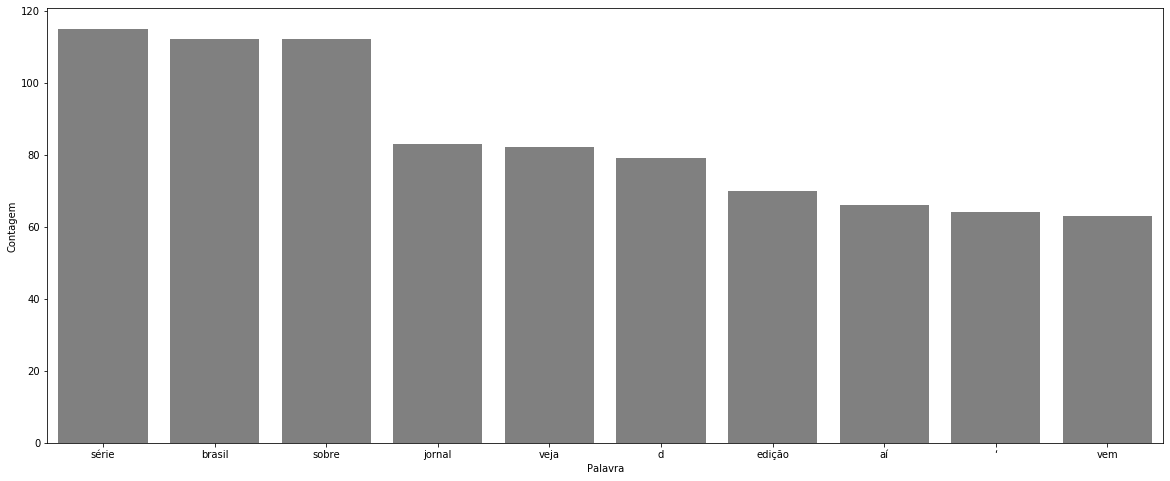

In [69]:
pareto(df,'titulo_processado')

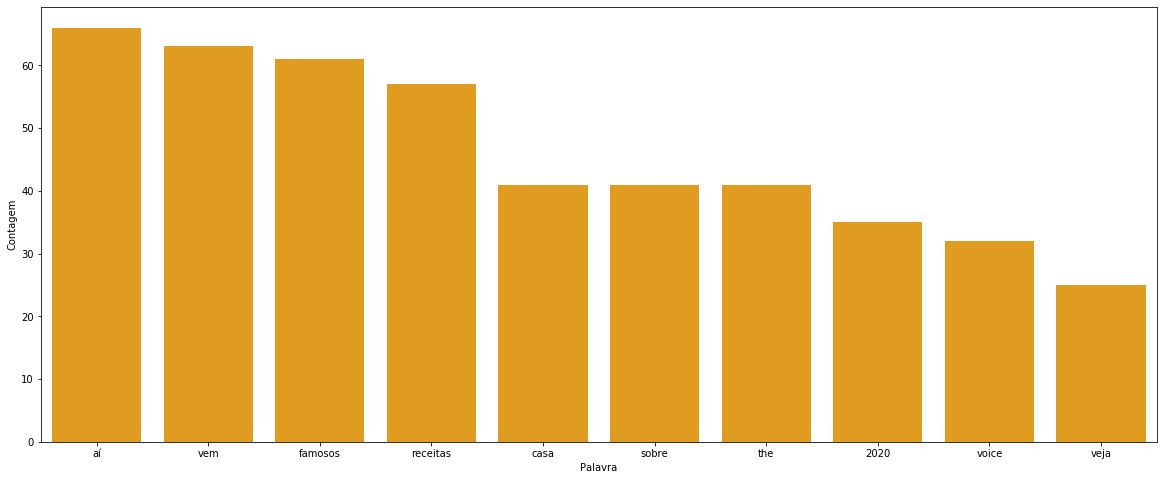

In [70]:
pareto(df,'titulo_processado','gshow')

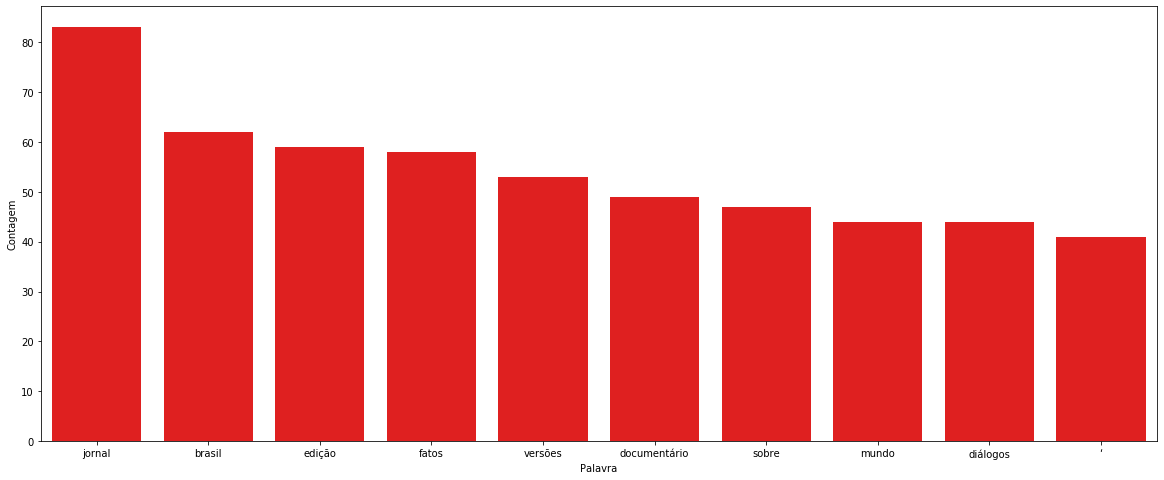

In [71]:
pareto(df,'titulo_processado','globonews')

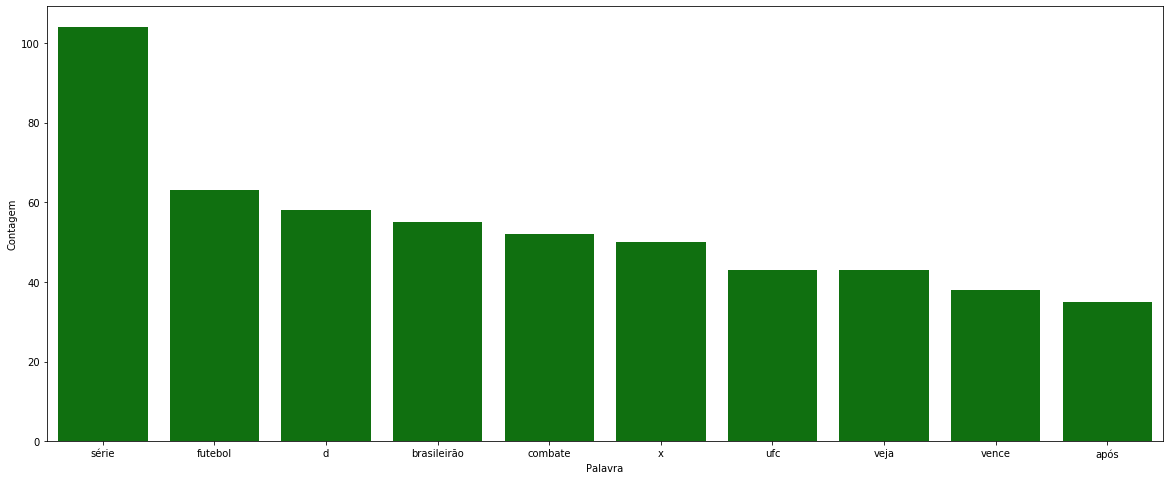

In [72]:
pareto(df,'titulo_processado','globoesporte')

In [73]:
bag_of_words = vetorizador.fit_transform(df["titulo_processado"])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df.url_origem, test_size=0.33, random_state=42)
reg_log = LogisticRegression()

reg_log.fit(x_train,y_train)
reg_log.score(x_test,y_test)

C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.4484848484848485